In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


In [83]:
spams = pd.read_csv(r"C:\Users\hlala\Downloads\spam.csv", encoding="latin-1")
#/Users/da_learner_mac_45/Downloads
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [84]:
spams.shape

(5572, 5)

In [85]:
spams.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Name the columns accordingly

In [86]:
spams.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [87]:
non_spam_ratio = round(len(spams[spams['v1'] == 'ham'])/len(spams['v1']) * 100, 2)
spam_ratio = round(len(spams[spams['v1'] == 'spam'])/len(spams['v1']) * 100, 2)

# Print the ratios
print("Not a Spam Email Ratio with label(0):", non_spam_ratio, "%")
print("Spam Email Ratio with label(1):", spam_ratio, "%")

Not a Spam Email Ratio with label(0): 86.59 %
Spam Email Ratio with label(1): 13.41 %


In [88]:
spams['length'] = spams.v2.str.len()
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


DATA ANALYSIS

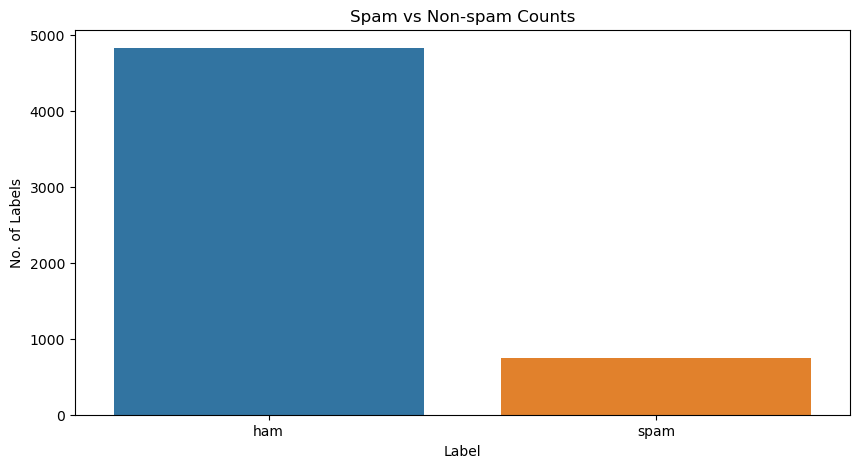

In [89]:

plt.figure(figsize=(10,5))
sns.countplot(x='v1', data=spams)
plt.xlabel('Label')
plt.ylabel('No. of Labels')
plt.title('Spam vs Non-spam Counts')
plt.show()

In [90]:
spams['label'] = spams['v1'].map({'ham': 0, 'spam': 1})
spams['message']=spams['v2']
spams.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','v1','v2'], axis=1, inplace=True)
#Converting all messages in column v2 to lower case
spams['message'] = spams['message'].str.lower()
spams.head()


,length,label,message
0,111,0,"go until jurong point, crazy.. available only ..."
1,29,0,ok lar... joking wif u oni...
2,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,49,0,u dun say so early hor... u c already then say...
4,61,0,"nah i don't think he goes to usf, he lives aro..."


BALANCE DATA

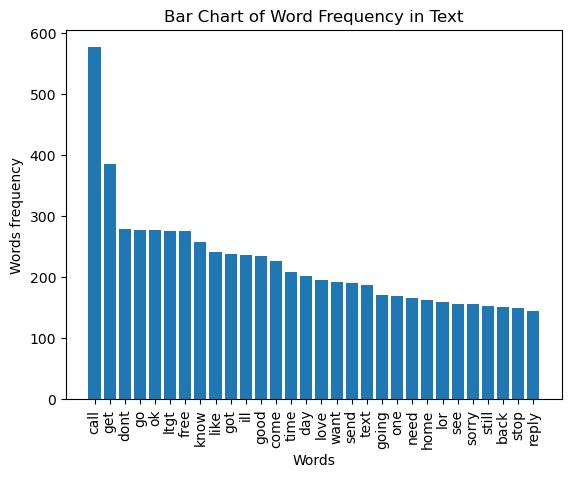

In [91]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

def preprocess(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english')+ ['it','u','16','2','4','ur','txt','im','r'])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

spams['message'] = spams['message'].apply(preprocess)

# Tokenize the preprocessed text data
tokenized_text = [word for email in spams['message'] for word in email.split()]

# Create a frequency distribution of the tokens
freq_dist = nltk.FreqDist(tokenized_text)

# Get the most common words and their counts
most_common_words = freq_dist.most_common(30)
words = [word[0] for word in most_common_words]
counts = [word[1] for word in most_common_words]

# Create a bar plot of the most common words
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Words frequency')
plt.title('Bar Chart of Word Frequency in Text')
plt.show()


In [92]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hlala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
spams['num_characters']=spams['message'].apply(len)
spams.head()

,length,label,message,num_characters
0,111,0,go jurong point crazy available bugis n great ...,82
1,29,0,ok lar joking wif oni,21
2,155,1,free entry wkly comp win fa cup final tkts 21s...,129
3,49,0,dun say early hor c already say,31
4,61,0,nah dont think goes usf lives around though,43


In [94]:
from nltk.tokenize import word_tokenize
spams['message'].apply(lambda x: nltk.word_tokenize(x))

0       [go, jurong, point, crazy, available, bugis, n...
1                             [ok, lar, joking, wif, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3                 [dun, say, early, hor, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, contact, å£750, pound, priz...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

In [95]:
spams['num_words']=spams['message'].apply(lambda x:len(nltk.word_tokenize(x)))
spams.sample(5)

,length,label,message,num_characters,num_words
2577,37,0,hey whats sleeping morning,26,4
1820,76,0,ill probably tomorrow even later tonight somet...,57,8
1522,96,0,thk dun haf hint e forum already lor cos told ...,76,16
4387,41,0,see christmassy,15,2
2074,63,0,yar lor actually quite fast cos da ge slow wat...,51,11


In [96]:
spams['num_sentences']=spams['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [97]:
ham=spams[spams["label"]==0]
spam=spams[spams["label"]==1]

<AxesSubplot:>

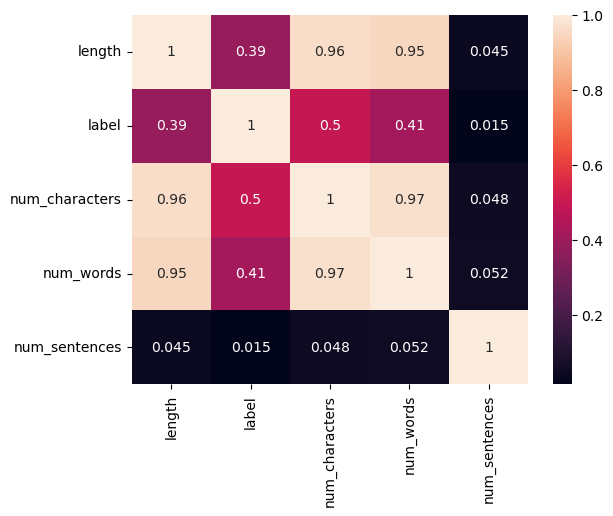

In [98]:
#plotting a heatmap for the correlation
sns.heatmap(spams.corr(),annot=True)

In [99]:
ham.shape,spam.shape

((4825, 6), (747, 6))

In [100]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 6)

c:\Users\hlala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

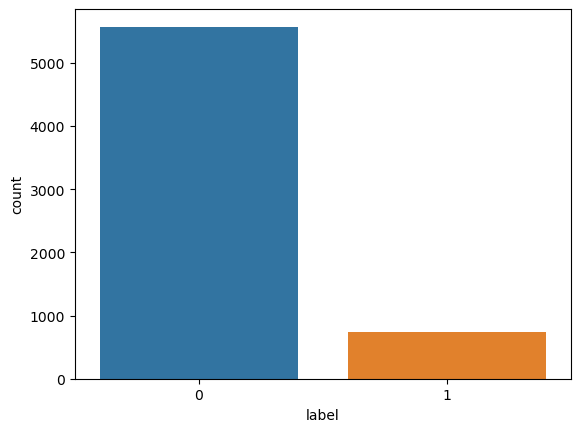

In [102]:
sns.countplot(data["label"])

REGULAR EXPRESSION

In [103]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

# Replace email addresses with 'email'
spams['message'] = spams['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
spams['message'] = spams['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
spams['message'] = spams['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
spams['message'] = spams['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
spams['message'] = spams['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hlala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\4251016736.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  spams['message'] = spams['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\4251016736.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  spams['message'] = spams['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\4251016736.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  spams['message'] = spams['message'].str.replace(r'£|\$', 'dollers')
C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\4251016736.py:17: FutureWarnin

In [104]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [105]:
# Remove punctuation
spams['message'] = spams['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
spams['message'] = spams['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
spams['message'] = spams['message'].str.replace(r'^\s+|\s+?$', '')

C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\4263627612.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  spams['message'] = spams['message'].str.replace(r'[^\w\d\s]', ' ')
C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\4263627612.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  spams['message'] = spams['message'].str.replace(r'\s+', ' ')
C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\4263627612.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  spams['message'] = spams['message'].str.replace(r'^\s+|\s+?$', '')


In [106]:
spams.head()

,length,label,message,num_characters,num_words,num_sentences
0,111,0,go jurong point crazy available bugis n great ...,82,16,1
1,29,0,ok lar joking wif oni,21,5,1
2,155,1,free entry wkly comp win fa cup final tkts num...,129,21,1
3,49,0,dun say early hor c already say,31,7,1
4,61,0,nah dont think goes usf lives around though,43,8,1


In [107]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from nltk.stem import LancasterStemmer, SnowballStemmer

# Define stemmers
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')

# Define vectorizers
tfidf = TfidfVectorizer(stop_words='english', tokenizer=lambda text: snowball.stem(lancaster.stem(text)))
hashing = HashingVectorizer(stop_words='english', tokenizer=lambda text: snowball.stem(lancaster.stem(text)))

# Generate feature vectors
X_tfidf = tfidf.fit_transform(spam['message'])
X_hashing = hashing.fit_transform(spam['message'])
y = spams['label']


c:\Users\hlala\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\hlala\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


WORD CLOUD

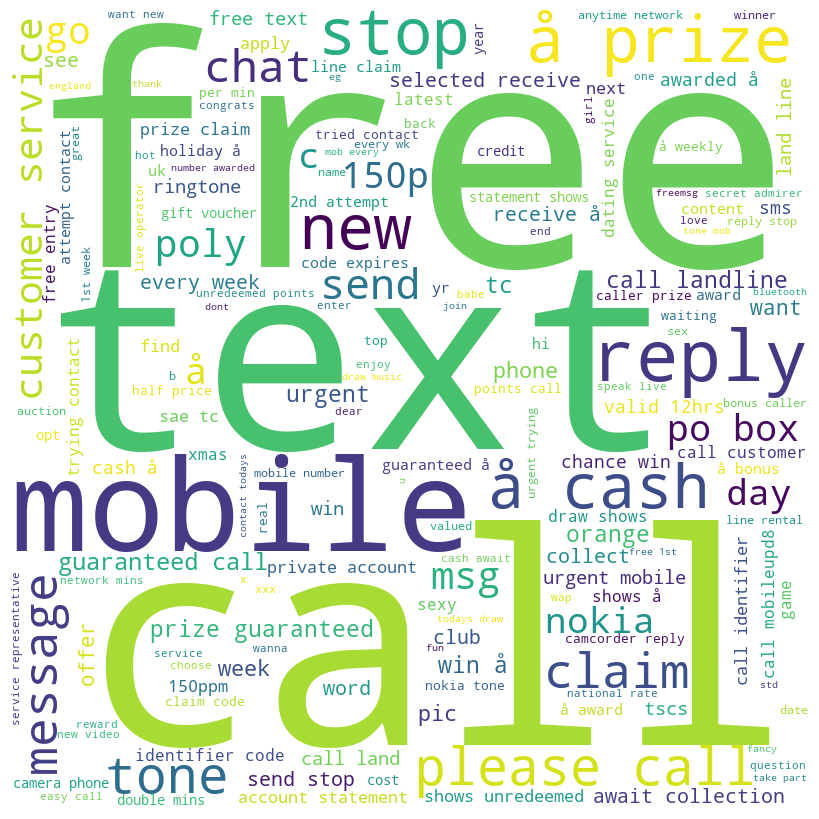

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single string
all_messages = ' '.join(spam['message'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_messages)

# Plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


TF-IDF vectorizer

In [110]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label


tf_vec = TfidfVectorizer()

#naive = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

features = tf_vec.fit_transform(spams['message'])

X = features
y = spams['label']


MODEL BUILDING

In [111]:
# Preprocess the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam.message)
y = spam.label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate the model
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



CLASSIFICATION REPORT

In [112]:
X

<747x2883 sparse matrix of type '<class 'numpy.int64'>'
	with 11118 stored elements in Compressed Sparse Row format>

In [113]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [114]:
# Evaluate the model on the training set
y_train_pred = nb.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       597

    accuracy                           1.00       597
   macro avg       1.00      1.00      1.00       597
weighted avg       1.00      1.00      1.00       597



In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



CONFUSION MATRIX

Confusion matrix:
 [[150]]


C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\515965696.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hlala\AppData\Local\Temp\ipykernel_5620\515965696.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


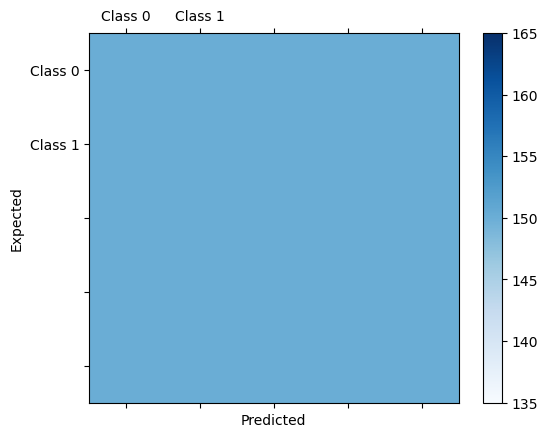

In [116]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()